<a href="https://colab.research.google.com/github/angelanto0127/Task1---Big-Data-Analysis/blob/main/Big_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install -q pyspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("BigDataAnalysis") \
    .getOrCreate()


In [6]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

# Download the file locally
!wget -q https://raw.githubusercontent.com/datablist/sample-csv-files/main/files/people/people-100000.csv -O /tmp/people-100000.csv

# Define schema
schema = StructType([
    StructField("Index", IntegerType(), True),
    StructField("User Id", StringType(), True),
    StructField("First Name", StringType(), True),
    StructField("Last Name", StringType(), True),
    StructField("Sex", StringType(), True),
    StructField("Email", StringType(), True),
    StructField("Phone", StringType(), True),
    StructField("Date of birth", StringType(), True),
    StructField("Job Title", StringType(), True),
    StructField("Date", StringType(), True),
    StructField("Country", StringType(), True)
])

# Read the downloaded file with Spark using the defined schema
df = spark.read.csv("/tmp/people-100000.csv", header=True, schema=schema)
df.show(5)

+-----+-------+----------+---------+---+-----+-----+-------------+---------+----+-------+
|Index|User Id|First Name|Last Name|Sex|Email|Phone|Date of birth|Job Title|Date|Country|
+-----+-------+----------+---------+---+-----+-----+-------------+---------+----+-------+
+-----+-------+----------+---------+---+-----+-----+-------------+---------+----+-------+



In [7]:
# View schema
df.printSchema()

# Count rows
print("Total Rows:", df.count())

# Basic stats
df.describe().show()

# Group by a column
df.groupBy("Sex").count().show()

root
 |-- Index: integer (nullable = true)
 |-- User Id: string (nullable = true)
 |-- First Name: string (nullable = true)
 |-- Last Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- Phone: string (nullable = true)
 |-- Date of birth: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Country: string (nullable = true)

Total Rows: 0
+-------+-----+-------+----------+---------+----+-----+-----+-------------+---------+----+-------+
|summary|Index|User Id|First Name|Last Name| Sex|Email|Phone|Date of birth|Job Title|Date|Country|
+-------+-----+-------+----------+---------+----+-----+-----+-------------+---------+----+-------+
|  count|    0|      0|         0|        0|   0|    0|    0|            0|        0|   0|      0|
|   mean| NULL|   NULL|      NULL|     NULL|NULL| NULL| NULL|         NULL|     NULL|NULL|   NULL|
| stddev| NULL|   NULL|      NULL|     NULL|NULL| NULL|

In [9]:
from pyspark.sql.functions import datediff, col, current_date, months_between

# Convert 'Date of birth' to date type
df = df.withColumn("Date of birth", col("Date of birth").cast("date"))

# Calculate age in years
df = df.withColumn("age", (months_between(current_date(), col("Date of birth")) / 12).cast("integer"))

df.select("Date of birth", "age").show(5)

+-------------+---+
|Date of birth|age|
+-------------+---+
+-------------+---+



In [10]:
# Group by age and count
age_counts = df.groupBy("age").count()

# Order by count in descending order and show the top 10
age_counts.orderBy("count", ascending=False).show(10)

+---+-----+
|age|count|
+---+-----+
+---+-----+



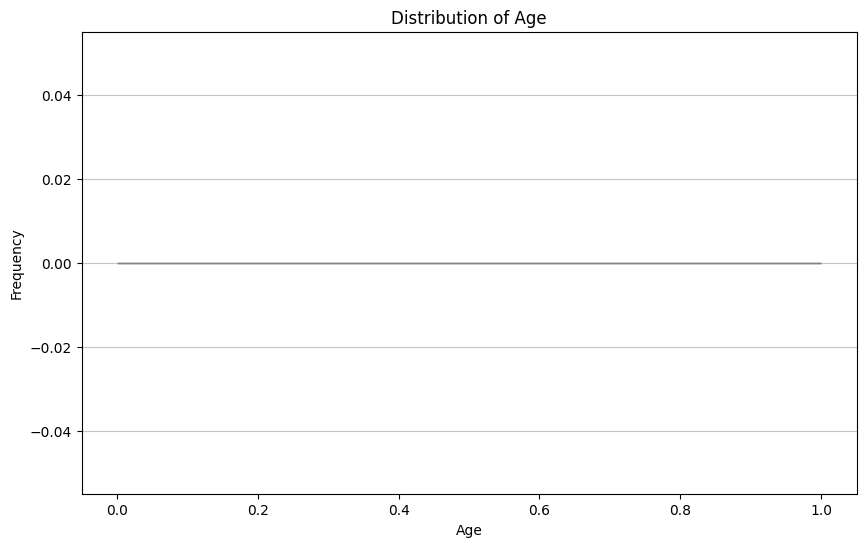

In [11]:
import matplotlib.pyplot as plt

# Convert the age column to a Pandas DataFrame for visualization
# Note: This is suitable for smaller datasets. For very large datasets, consider sampling or using distributed plotting libraries.
age_data = df.select("age").toPandas()

# Plot a histogram of the age distribution
plt.figure(figsize=(10, 6))
plt.hist(age_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(axis='y', alpha=0.75)
plt.show()